# Read Library

In [24]:
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read Data

In [2]:
data = mnist.load_data()

# Data Preprocessing

In [3]:
(X_train, Y_train), (X_test, Y_test) = data
x_train = X_train.reshape(60000, 1, 28, 28)/255
x_test = X_test.reshape(10000, 1, 28, 28)/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
y_test.shape # category 0~9 = 10 columns

(10000, 10)

# Build Model

In [7]:
def Build_Model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, 28, 28), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=2, data_format='channels_first'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

# Train Model

In [8]:
model = Build_Model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))



Epoch 1/10
60000/60000 [==============================] - 9s 153us/step - loss: 0.3081 - accuracy: 0.9119
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1145 - accuracy: 0.9660
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0808 - accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0640 - accuracy: 0.9799
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0505 - accuracy: 0.9840
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0437 - accuracy: 0.9861
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0362 - accuracy: 0.9886
Epoch 8/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0312 - accuracy: 0.9898
Epoch 9/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0269 - accuracy: 0.9914
Epoch 10/10
10000/10000 [===========================

# Validation

In [29]:
def images(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

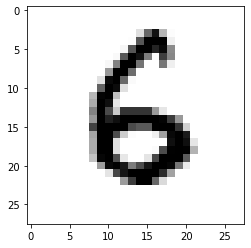

The Prediction of this Image is: 6


In [28]:
# Example
example = x_train[106].reshape(1,1,28,28)
# Show Image
images(example)

# Predict Result
Result = np.argmax(model.predict(example))
print("The Prediction of this Image is: {}".format(Result))